<a href="https://colab.research.google.com/github/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab13/Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivos da aula:**

*   apresentar e aplicar o conceito de FEATURE
*   apresentar e aplicar o conceito de DESCRITORES



**QUAL O PROBLEMA?**

Estamos tentando ao longo do curso computar imagens de forma eficiente. Na última aula aprendemos e usamos a técnica ***template matching***, vimos que é uma técnica simples e poderosa que basicamente convolui uma template em um espaço de busca (Imagem). Contudo, possui algumas fragilidades tais como, escala, rotação e intensidade luminosa.



Queremos encontrar **essa caixa**.
<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab13/box.png?raw=1">

[](https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab13/box.png?raw=1)

Neste espaço de busca, imagem.
<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab13/box_in_scene.png?raw=1">

**Vamos pensar um pouco...**

Com as técnicas que conhecemos, como podemos fazer essa detecção da caixa??





...

**FEATURES**

Features em visão computacional são detalhes de uma imagem, que fornecem informações sobre o que ela significa. Já conhecemos e aplicamos técnicas para detecção por cor e contorno, por exemplo.

Hoje, vamos conhecer uma técnica que extrai da imagem uma descrição local com pontos de interesse (key points), desta forma criamos uma assinatura para cada ponto da imagem, a ideia é maximizar pontos que apresentam que apresentam invariância a rotação, escala e translação. Assim conseguimos buscar e encontrar esses pontos em outras imagens.

Os principais algoritmos são:

SIFT,ORB, SURF, FAST, BRISK

Onde usamos esses algoritmos?

    Reconhecimento de objetos
    alinhamento de imagens (imagens panorâmicas)
    reconstrução 3d
    tracking de imagem
    indexação de imagem (banco de imagem)
    

    



In [ ]:
## vou fazer o download das imagens do repositório para usar no colab mais facil....

!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab13/box_4features.png /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab13/box_in_scene.png /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab13/box.png /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab13/admiravelmundonovo.jpg /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab13/admiravelmundonovo.mp4 /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab13/q22.jpg /content
!wget https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab13/q11.jpg /content


### Reconhecimento de imagem no espaço de busca


Vamos usar a imagem acima para aplicar esse método.

Vamos usar o método ORB, é semelhante ao SIFT, mas não é patenteado.

https://docs.opencv.org/3.4/db/d95/classcv_1_1ORB.html

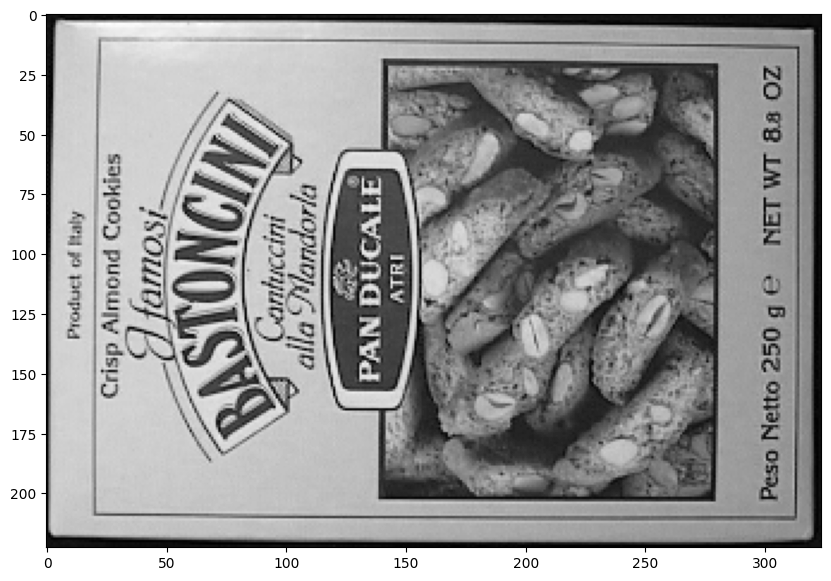

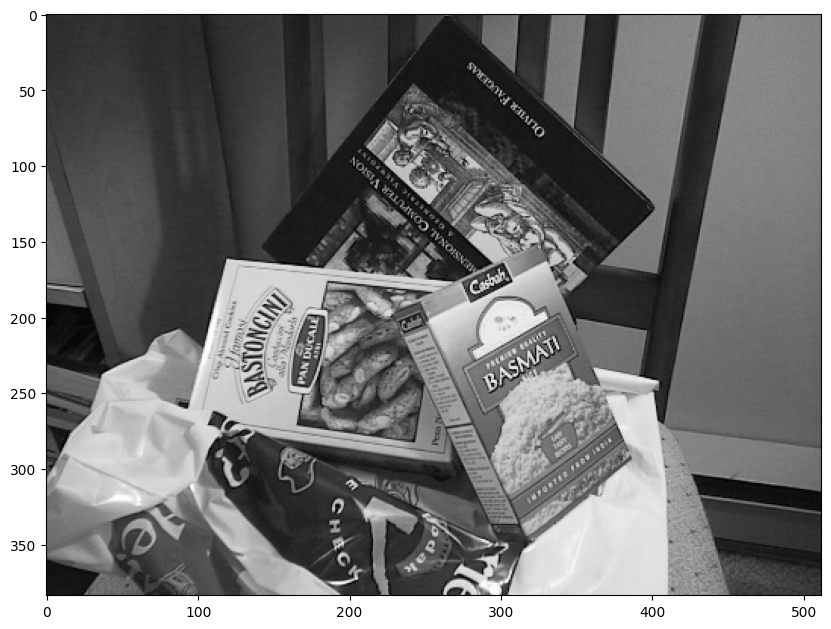

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)

#template
plt.figure(figsize = (10,10))
plt.imshow(img1, cmap="gray"); plt.show();

# Imagem espaço de busca
plt.figure(figsize = (10,10))
plt.imshow(img2, cmap="gray"); plt.show();


In [2]:
# inicializa com o construtor ORB
orb = cv2.ORB_create()


In [3]:
# Detecta os keypoints
#kp = orb.detect(img1,None)
# Computa os Descritores
#orb_tuple = orb.compute(img1, kp)

#Podemos usar uma função que calcula os keypoints e Descritores
kp1, des1 = orb.detectAndCompute(img1,None)


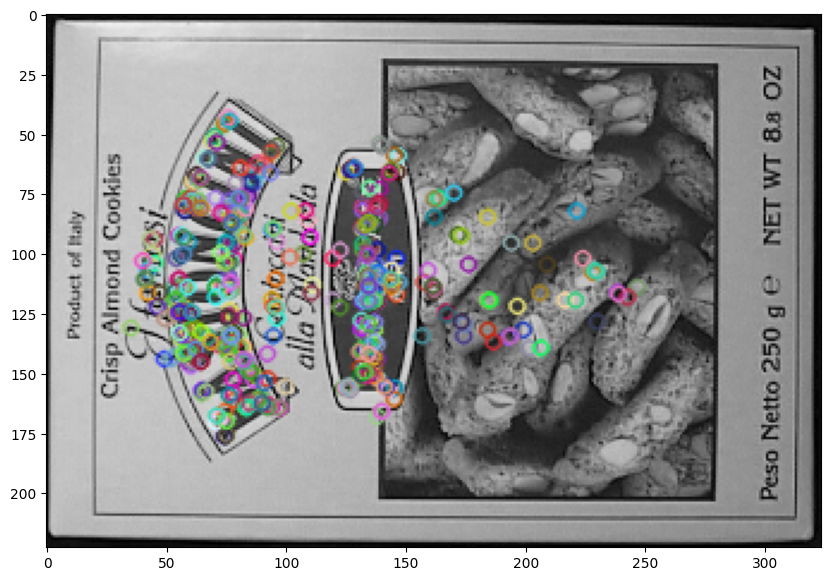

In [4]:
# Desenha os keypoints na imagem 
gray2 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=0)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB));


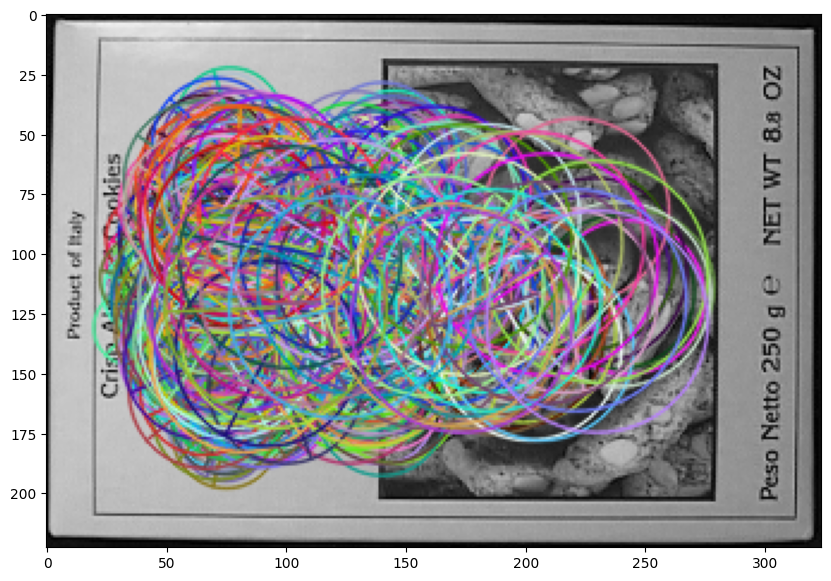

In [5]:
# Os keypoints são formados dos gradientes da imagem naquele ponto, por essa razão possuem amplitude e direção
gray3 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(gray3, cv2.COLOR_BGR2RGB))

## Desafio 1

Por default os métodos descritores quando são criados estão configurados para encontrar 500 features na imagem.

Busque na documentação da OpenCV como alterar esse parâmetro e descubra quais outros parâmetros podem ser configurados no método ***cv2.orb_create()***


https://docs.opencv.org/3.4/db/d95/classcv_1_1ORB.html


In [ ]:
### Implemente sua solução aqui.....










O resultado para 4 features, nessa imagem conseguimos visualizar os keypoints e sua direção e amplitude do vetor gradiente resultante.
<img src="https://github.com/arnaldojr/cognitivecomputing/blob/master/material/aulas/PDI/lab13/box_4features.png?raw=1">

## Continuando...

Agora já possuímos a "assinatura" da nossa caixa de cereais.

Vamos realizar a detecção e descrições dos keypoints da imagem do espaço de busca.




## Desafio 2

Faça um código que calcula os keypoints para a imagem no espaço de busca. Compare a caixa de cereal das duas imagens (box e box_in_scene), existe correlação entre todos os keypoints?

In [ ]:
## Implemente sua solução aqui......







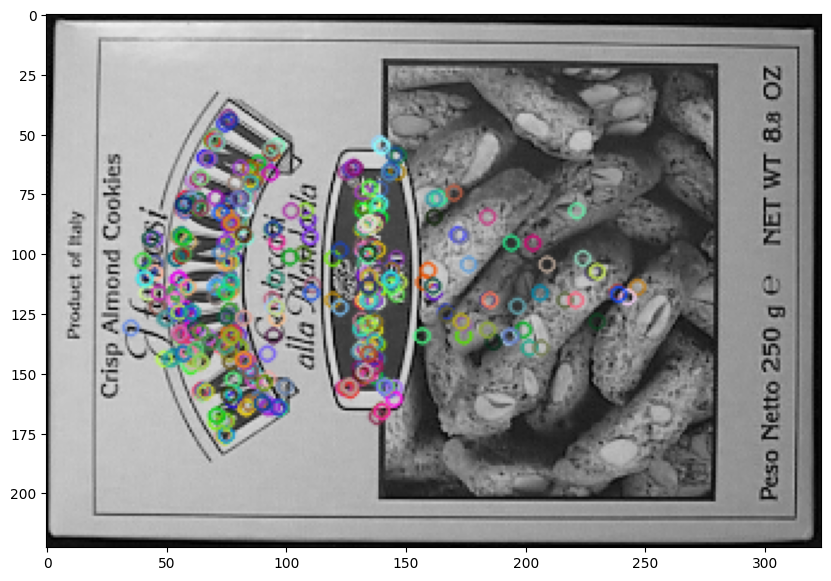

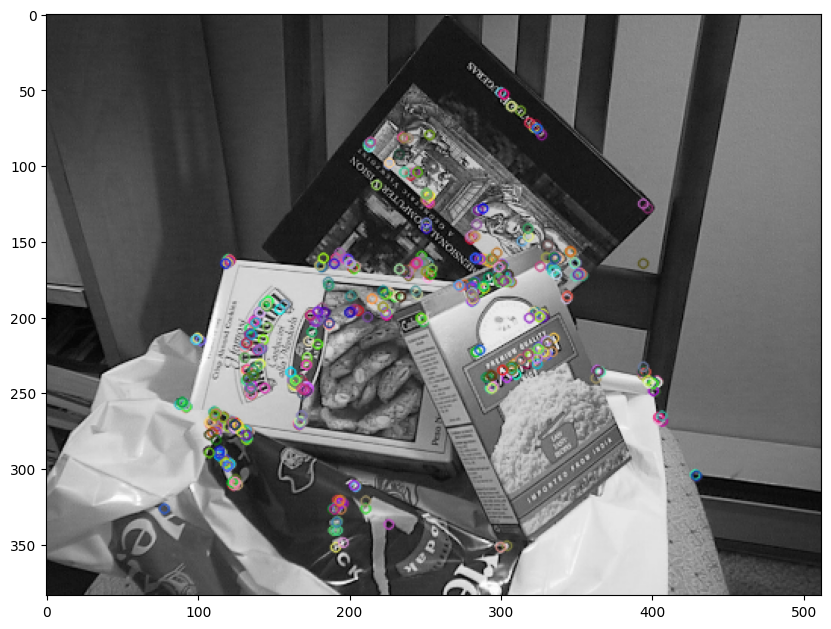

In [6]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img1 = cv2.imread('box.png',0)
img2 = cv2.imread('box_in_scene.png',0)

# inicializa com o construtor ORB
orb = cv2.ORB_create()

#Podemos usar uma função que calcula os keypoints e Descritores
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)


gray1 = cv2.drawKeypoints(img1, kp1, outImage=np.array([]), flags=0)
gray2 = cv2.drawKeypoints(img2, kp2, outImage=np.array([]), flags=0)


#template
plt.figure(figsize = (10,10))
plt.imshow(gray1); plt.show();

# Imagem espaço de busca
plt.figure(figsize = (10,10))
plt.imshow(gray2); plt.show();


## Fazendo o match...

Visualmente podemos ter uma intuição se existe matching entre os keypoints, mas na vamos usar a função ***cv2.BFMatcher()***


Foram encontrados: 148 matches


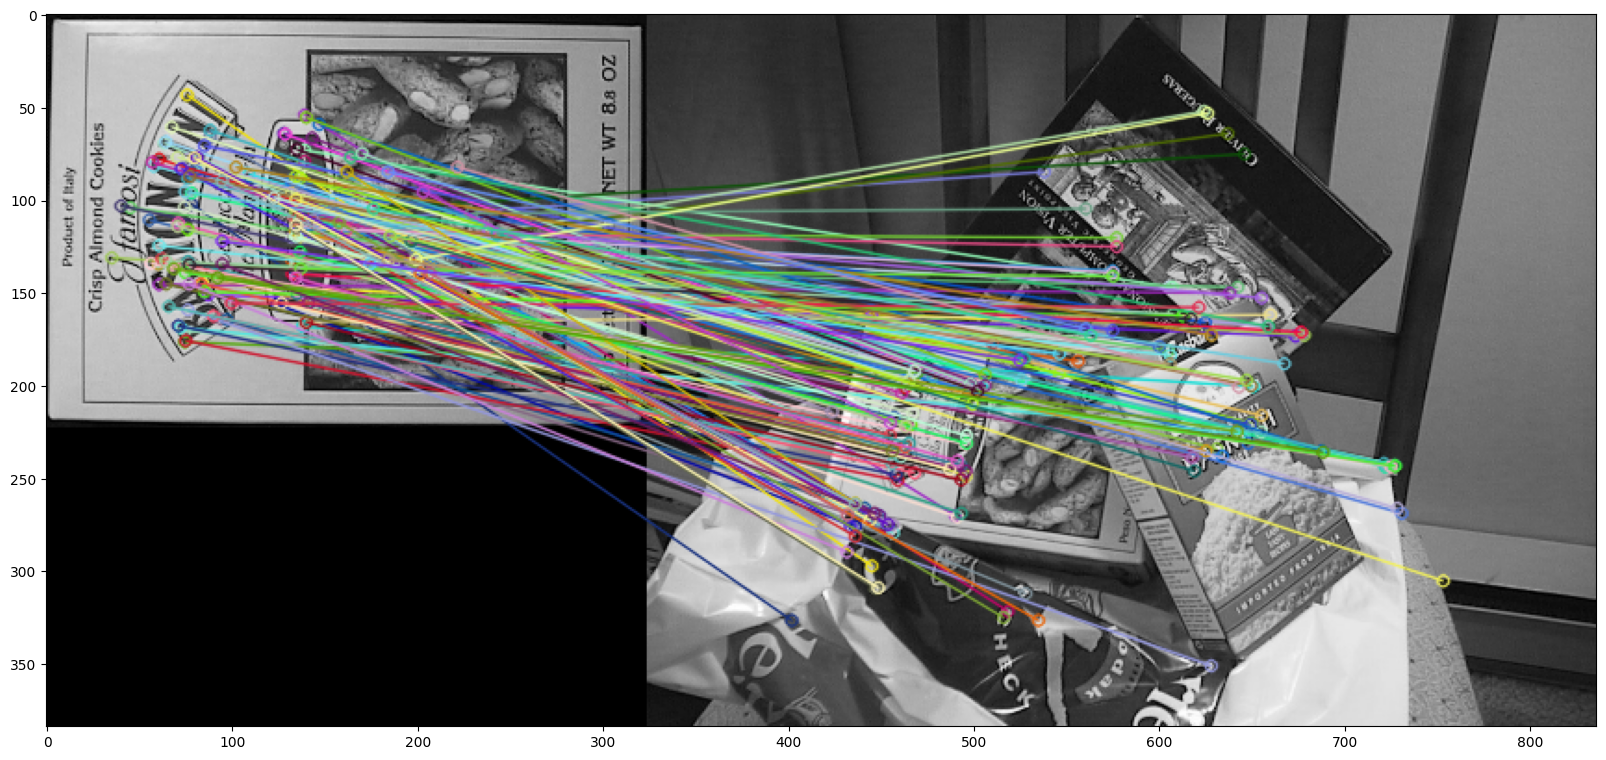

In [7]:
# cria o objeto bf (Brute-force descriptor matcher)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# a função match devolve os matches encontrados
matches = bf.match(des1,des2)

print("Foram encontrados: {} matches".format(len(matches)))

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)

plt.figure(figsize = (20,10))
plt.imshow(img3); plt.show();


Parece que o resultado não foi o que estávamos esperando... mas nem tudo está perdido ainda. vamos fazer alguns ajustes nas funções matches e na quantidade keypoints printados. Muitos keypoints são falsos positivos.

Primeiro, vamos ordenar o vetor matches para ficar de acordo com a distância entre os descritores. Quanto mais baixo, melhor.


### Pausa para uma dica Python

ordenação de vetor e função lambda, veja como é simples :)


In [8]:
## Vamos dar uma olhada em duas funções novas do python. sorted() e lambda

# essa a lista de compra da feira, item e preço.

lista = [
    ('Banana', 18),
    ('Maça', 1),
    ('Goiaba', 20),
    ('Uva', 22),
    ('Pera', 12)
]

print("lista não ordenada: ",lista) # lista não ordenada

lista_ord = sorted(lista)

print("lista ordenada ordem alfabetica: ",lista_ord) # lista ordenada por indice a..z

lista_ord_pre = sorted(lista, key= lambda x:x[1])

print("lista ordenada por preço: ",lista_ord_pre) # lista ordenada pelo preço

lista não ordenada:  [('Banana', 18), ('Maça', 1), ('Goiaba', 20), ('Uva', 22), ('Pera', 12)]
lista ordenada ordem alfabetica:  [('Banana', 18), ('Goiaba', 20), ('Maça', 1), ('Pera', 12), ('Uva', 22)]
lista ordenada por preço:  [('Maça', 1), ('Pera', 12), ('Banana', 18), ('Goiaba', 20), ('Uva', 22)]


### Voltando ao nosso problema

### Resultado de match

O resultado de matches = bf.match(des1,des2) devolve uma lista de objetos do tipo DMatch. Os atributos são:

 - DMatch.distance - Distancia entre os descritores da menor para maior distância. (Quanto menor melhor)
 - DMatch.trainIdx - Index of the descriptor in train descriptors
 - DMatch.queryIdx - Index of the descriptor in query descriptors
 - DMatch.imgIdx - Index of the train image.

In [9]:
# ordenamos o vetor matches para ficar os melhores (menor distancia) no inicio da lista

matches = sorted(matches, key = lambda x:x.distance)


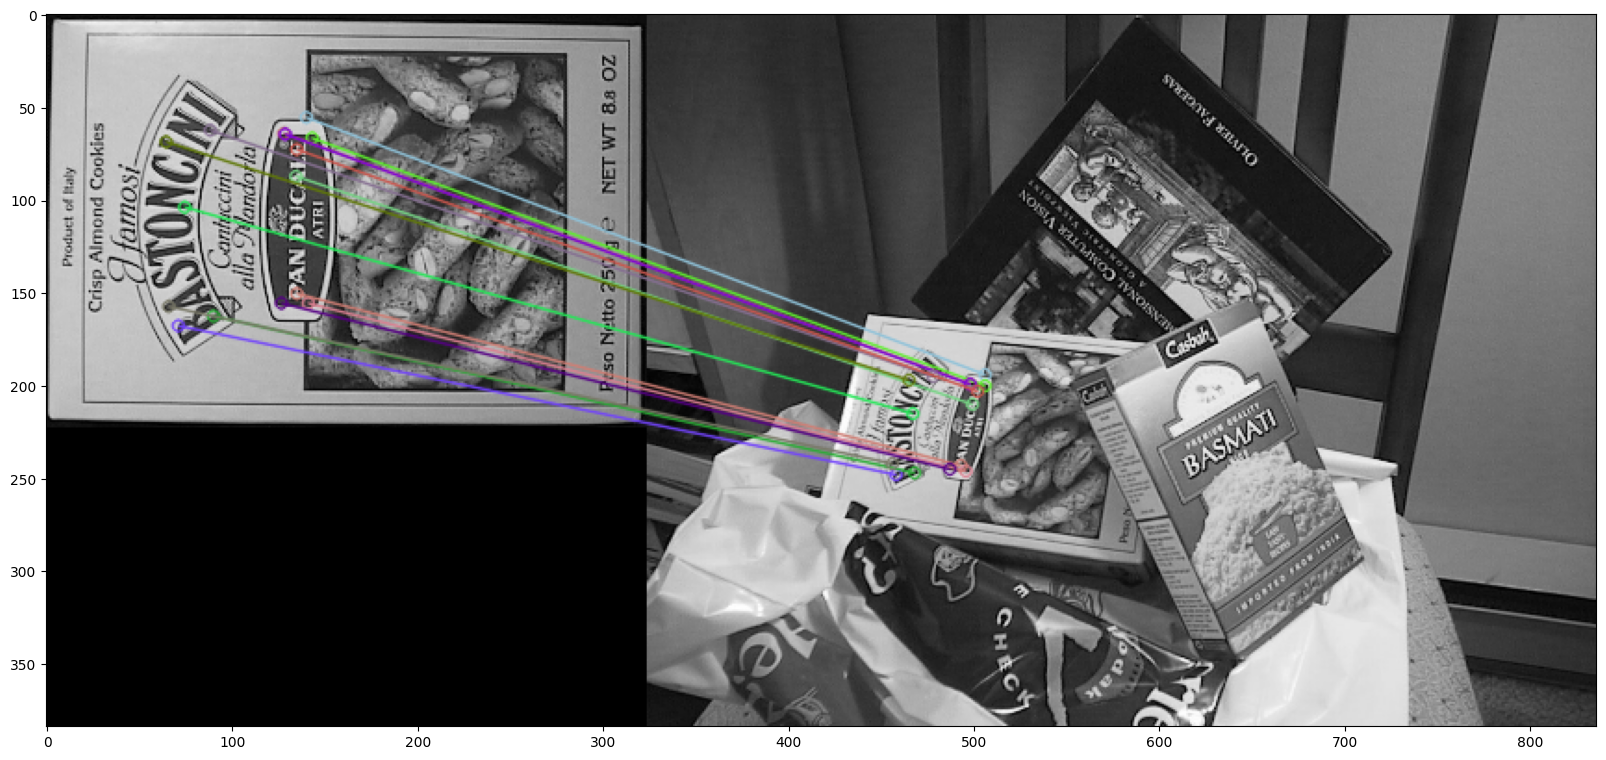

In [10]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:15],None, flags=2)


plt.figure(figsize = (20,10))
plt.imshow(img3); plt.show();

## Desafio 3 

Refaça este notebook utilizando o método SIFT. 

Dicas: No início do código, basta trocar o orb por sift.


Para a função ***cv2.BFMatcher()*** use o método baseado em KNN ***knnMatch()***

Encontre por material de refência em projetos de outras pessoas no github.  

In [ ]:
## implemente sua solução aqui......







## Desafio 4 - Para entregar 

Implemente um código em python .py que realiza a detecção em tempo real da webcam. Sugestão: como template, escolha um livro, ou algo semelhante.

no repositório deixei como sugestão uma imagem e um video que pode ser utilizado como referência se chama ``admiravelmundonovo`` jpg e mp4 respectivamente.

Para desenhar o contorno quando é encontrado match use a função abaixo:


```python
def desenhaContorno(qp,tp,refImg,frame):
        """
        essa função do tipo void que desenha o contorno quando existe matches das duas imagens
        
        recebe:
         - qp,tp que representa a conversão de keypoints em argumentos para o findhomography ref:https://answers.opencv.org/question/122802/how-to-convert-keypoints-to-an-argument-for-findhomography/
         - refImg = imagem de referência
         - frame = imagem de destino onde será desenhado o contorno

    """
        # o findHomography mapeia os pontos de um plano em outro.
        # ou seja, mapeia os keypoints da imagem ref em frame
        H,status=cv2.findHomography(qp,tp,cv2.RANSAC,3.0)
        
        # extrai o shape da imagem de referencia
        h,w=refImg.shape
        # Mapeia os pontos das bordas com base no shape refImg (imagem de referncia), são 4 pontos
        #  [0,0]        [w-1,0]
        #
        # 
        #  [0,h-1]      [w-1,h-1]
        #
        refBorda=np.float32([[[0,0],[0,h-1],[w-1,h-1],[w-1,0]]])
        # Usa refBorda e a matrix de homografia H para calcular a matrix transformação de pespectiva
        frameBorda=cv2.perspectiveTransform(refBorda,H)
        # polylines desenha poligonos ou qualquer imagem, na cor verde e largura do traço igual a 5.
        cv2.polylines(frame,[np.int32(frameBorda)],True,(0,255,0),5)
```

Busque por referências externas para resolver o desafio. Bom trabalho.

In [ ]:
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina. 
######## Não faça esse desafio no google colab, faça em sua máquina.

## Imagem panorâmica

Imagem panorâmica, para criar a nossa imagem panorâmica vamos utilizar todos os conceitos que vimos de extração e descrição de features. 

Vou demonstrar duas técnicas para realizar esse processo. 

O primeiro utilizando os passos do método que aprendemos, realizando a extração de features com SIFT, destacando as melhores correlações e realizando a sobreposição das imagens. Uma sugestão de como realizar este processo está implementado no link do github, os códigos estão abertos e pode ser explorado.

ref. https://github.com/linrl3/Image-Stitching-OpenCV.git


O segundo é utilizando uma função built-in da openCV para isso, ***cv2.Stitcher()*** por debaixo dos panos essa função realiza as mesmas técnicas que estudamos, com a diferença de estar otimizada para uso.

ref. https://docs.opencv.org/master/d2/d8d/classcv_1_1Stitcher.html

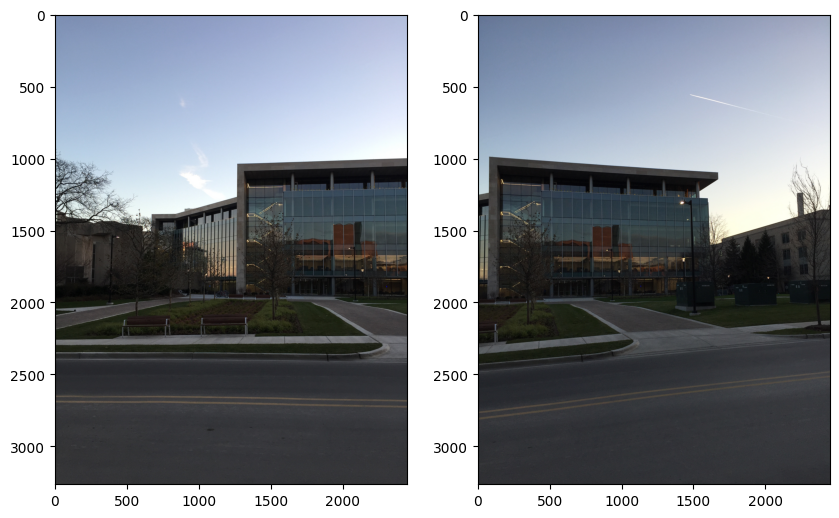

In [11]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# carrega as imagens
img = cv2.imread("q11.jpg")
img2 = cv2.imread("q22.jpg")


# Exibe as imagens que serão usadas
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show();

In [14]:
# Cria o objeto Stitcher
stitcher = cv2.Stitcher.create()

# Essa é a parte mais complicada do código, é aqui que o hard work é feito. 
# o método devolve em status se foi possivel realizar overlap (sopreposição) das imagens na variavel status,
# se sim, a imagem esta panoramica está em result.
(status, result) = stitcher.stitch((img,img2))

if (status == cv2.STITCHER_OK):
    print("Sucesso, imagem gerada, exiba o result")
else:
    print("falha, não consegui gerar a imagem")

Sucesso, imagem gerada, exiba o result


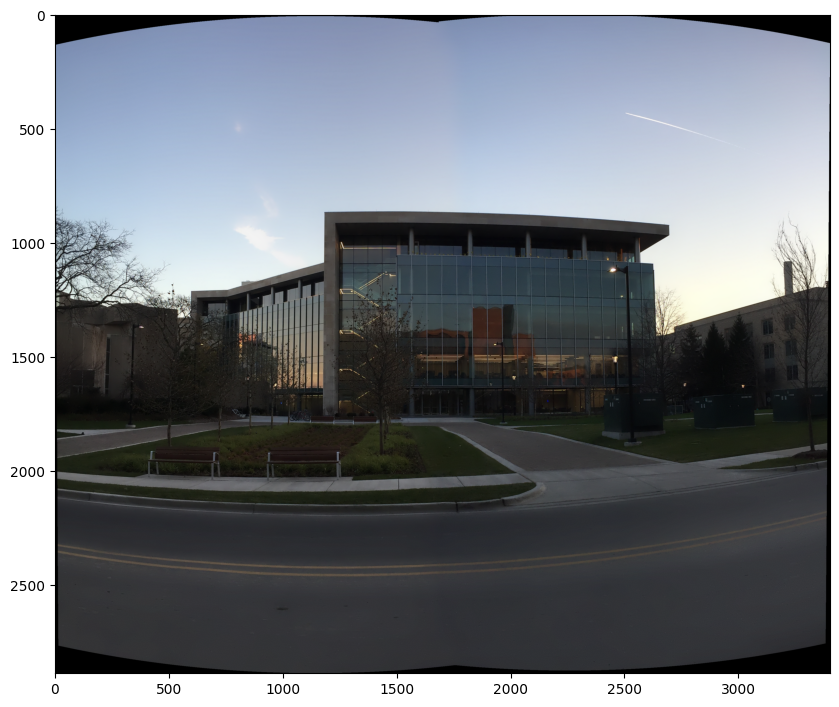

In [15]:
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)); plt.show();

Temos um bom resultado, mas as bordas não ficaram boas. Podemos aplicar um crop na imagem. Podemos fazer um crop chutando alguns valores ou podemos tentar fazer esse processo de forma automatica. 

(2889, 3402, 3)
2889 3402


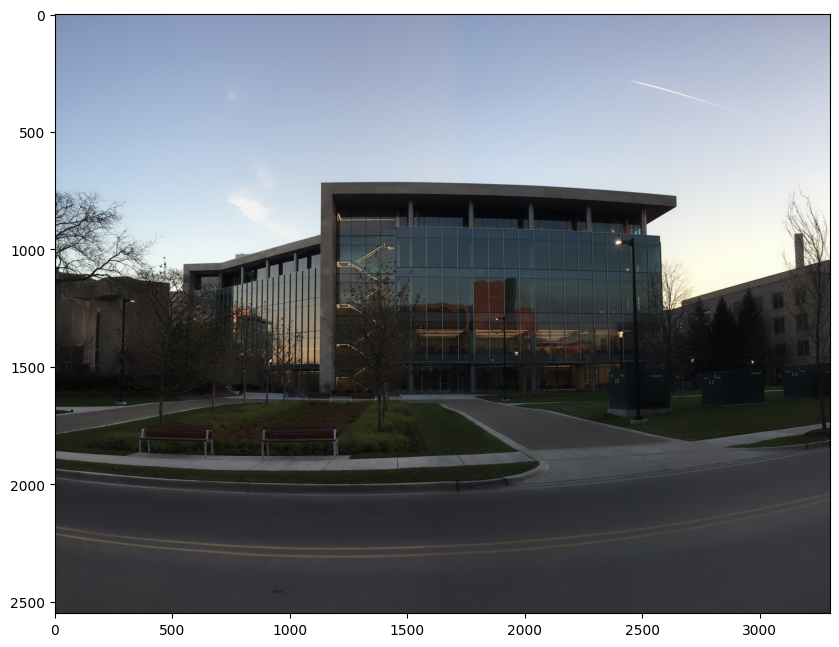

In [16]:
# não é a melhor tecnica, mas resolve...
print(result.shape)
h = result.shape[0]
w = result.shape[1]
print(h,w)
crop = result[150:2700, 50:3350]
plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)); plt.show();  